# Signal Quality Test

In [1]:
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, log_loss
import seaborn as sns
import os
import ast
import sys
import re
from statistics import mean, stdev
statistics_path = os.path.abspath("../")
sys.path.append(statistics_path)
import stats_utils
from matplotlib.ticker import MaxNLocator

In [2]:
path_to_exp_statistics = "/Users/admin/Desktop/thesis/dataset/metrics/"

In [3]:
path_to_exp_images = "/Users/admin/Desktop/thesis_writing/experiment_images/network_experiments/"

## 1. Compute Accuracy Plot for every dataset in a single diagram

In [5]:
exp_name = "exp_10_1_1"
poor_network = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")

In [8]:
poor_network.head()

,n_round,timestamp,devices_names,n_samples,y_true,y_pred,accuracy,energy_before,energy_after,training_time,training_without_compile_times,avg_rssi,latency,download_speed,upload_speed,rx_data,tx_data
0,1,2025:05:10_17:02:44,"['realme RMX3370', 'samsung SM-G975F', 'samsun...",44940,"{""realme RMX3370"": [0.0, 3.0, 2.0, 5.0, 4.0, 1...","{""realme RMX3370"": [5.0, 3.0, 5.0, 5.0, 5.0, 5...","{'realme RMX3370': 0.43295506, 'samsung SM-G97...","{""realme RMX3370"": ""{ Temperature = 34.9 C, Cu...","{""realme RMX3370"": ""{ Temperature = 34.9 C, Cu...",25.029062,8.068808,"{""realme RMX3370"": ""-62"", ""samsung SM-G975F"": ...","{""realme RMX3370"": ""62"", ""samsung SM-G975F"": ""...","{""realme RMX3370"": ""2.6270224226481274"", ""sams...","{""realme RMX3370"": ""5.900821609454137"", ""samsu...","{""realme RMX3370"": ""51468"", ""samsung SM-G975F""...","{""realme RMX3370"": ""7228"", ""samsung SM-G975F"":..."
1,2,2025:05:10_17:03:10,"['samsung SM-G975F', 'samsung SM-A510F', 'Xiao...",44940,"{""samsung SM-G975F"": [0.0, 3.0, 2.0, 5.0, 4.0,...","{""samsung SM-G975F"": [5.0, 3.0, 2.0, 5.0, 4.0,...","{'samsung SM-G975F': 0.6777036, 'samsung SM-A5...","{""samsung SM-G975F"": ""{ Temperature = 26.9 C, ...","{""samsung SM-G975F"": ""{ Temperature = 26.9 C, ...",19.176665,7.368087,"{""samsung SM-G975F"": ""-72"", ""samsung SM-A510F""...","{""samsung SM-G975F"": ""30"", ""samsung SM-A510F"":...","{""samsung SM-G975F"": ""1.111589213542702"", ""sam...","{""samsung SM-G975F"": ""14.92369329300836"", ""sam...","{""samsung SM-G975F"": ""51972"", ""samsung SM-A510...","{""samsung SM-G975F"": ""7228"", ""samsung SM-A510F..."
2,3,2025:05:10_17:03:34,"['samsung SM-G975F', 'Xiaomi M2006C3MNG', 'sam...",44940,"{""samsung SM-G975F"": [0.0, 3.0, 2.0, 5.0, 4.0,...","{""samsung SM-G975F"": [0.0, 3.0, 2.0, 5.0, 4.0,...","{'samsung SM-G975F': 0.78333336, 'Xiaomi M2006...","{""samsung SM-G975F"": ""{ Temperature = 26.9 C, ...","{""samsung SM-G975F"": ""{ Temperature = 26.9 C, ...",18.123159,6.942920,"{""samsung SM-G975F"": ""-72"", ""Xiaomi M2006C3MNG...","{""samsung SM-G975F"": ""82"", ""Xiaomi M2006C3MNG""...","{""samsung SM-G975F"": ""1.111589213542702"", ""Xia...","{""samsung SM-G975F"": ""14.92369329300836"", ""Xia...","{""samsung SM-G975F"": ""51972"", ""Xiaomi M2006C3M...","{""samsung SM-G975F"": ""7228"", ""Xiaomi M2006C3MN..."
3,4,2025:05:10_17:03:58,"['samsung SM-J730F', 'Xiaomi M2006C3MNG', 'sam...",44940,"{""samsung SM-J730F"": [0.0, 3.0, 2.0, 5.0, 4.0,...","{""samsung SM-J730F"": [0.0, 3.0, 2.0, 5.0, 5.0,...","{'samsung SM-J730F': 0.79697376, 'Xiaomi M2006...","{""samsung SM-J730F"": ""{ Temperature = 27.1 C, ...","{""samsung SM-J730F"": ""{ Temperature = 27.1 C, ...",17.787154,7.041161,"{""samsung SM-J730F"": ""-64"", ""Xiaomi M2006C3MNG...","{""samsung SM-J730F"": ""33"", ""Xiaomi M2006C3MNG""...","{""samsung SM-J730F"": ""4.1688738693966805"", ""Xi...","{""samsung SM-J730F"": ""2.2934106132268917"", ""Xi...","{""samsung SM-J730F"": ""51972"", ""Xiaomi M2006C3M...","{""samsung SM-J730F"": ""7228"", ""Xiaomi M2006C3MN..."
4,5,2025:05:10_17:04:39,"['samsung SM-A510F', 'samsung SM-G975F', 'sams...",44940,"{""samsung SM-A510F"": [0.0, 3.0, 2.0, 5.0, 4.0,...","{""samsung SM-A510F"": [5.0, 3.0, 2.0, 5.0, 5.0,...","{'samsung SM-A510F': 0.80507344, 'samsung SM-G...","{""samsung SM-A510F"": ""{ Voltage = 3644 mV, Cur...","{""samsung SM-A510F"": ""{ Voltage = 3644 mV, Cur...",34.706701,7.174740,"{""samsung SM-A510F"": ""-70"", ""samsung SM-G975F""...","{""samsung SM-A510F"": ""35"", ""samsung SM-G975F"":...","{""samsung SM-A510F"": ""1.038104124642667"", ""sam...","{""samsung SM-A510F"": ""6.446329055559825"", ""sam...","{""samsung SM-A510F"": ""51972"", ""samsung SM-G975...","{""samsung SM-A510F"": ""7228"", ""samsung SM-G975F..."


In [9]:
def generate_training_time_plot(df, path_to_exp_logs):
    plt.figure(figsize=(10, 5))
    plt.plot(df['n_round'], df['training_time'], label="Training Time", marker="o", linestyle="-")
    plt.plot(df['n_round'], df['training_without_compile_times'], label="Training (No Compilation)", marker="x", linestyle="--")

    total_time = df['training_time'].sum()
    total_time_no_compile = df['training_without_compile_times'].sum()

    plt.xlabel("Global Round")
    plt.ylabel("Time (Seconds)")
    plt.title(f"Training Time per Global Round\n(Total: {total_time:.2f} sec | No Compilation: {total_time_no_compile:.2f} sec)")
    plt.legend()
    plt.grid(True)

#     path_to_file = os.path.join(path_to_exp_logs, filename)
#     plt.savefig(path_to_file, dpi=300)
#     plt.close()

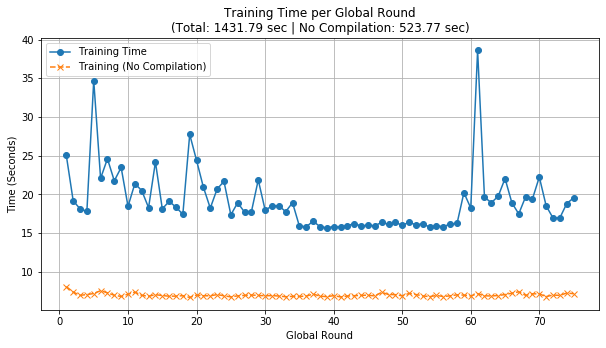

In [14]:
generate_training_time_plot(poor_network.iloc[0:75,:], None)

In [ ]:
# 23.8min, 8.7295